In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [109]:
df=pd.read_csv("./car_price_prediction.csv")

In [110]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Miêu tả dữ liệu

1.   ID	: Mã định danh duy nhất cho mỗi xe trong tập dữ liệu
2.   Price : Giá bán của xe

3. Levy : Thuế hoặc phí bổ sung được áp dụng cho xe
4. Manufacturer : Hãng sản xuất oto
5. Model : Tên cụ thể của kiểu xe
6. Prod. year : Năm sản xuất xe
7. Category : Phân loại xe( SUV, Sedan,...)
8. Leather interior: Nội thất bằng da, cho biết ghế có được bọc da hay không?
9. Fuel type : Loại nhiên liệu, xăng, dầu hybrid
10. Engine volume : Kích thước động cơ, thường được đo bằng lít
11. Mileage : Tổng quãng đường xe đã đi
12. Cylinders : Số xi- lanh của động cơ
13. Gear box type : Loại hộp số, số động hay số sàn
14. Drive wheels : Bánh xe dẫn động( loại dẫn động)- dẫn động cầu trước, cầu sau, dẫn động 4 bánh
15. Doors: Số cửa, chia thành 2-3 , 4-5 , > 5 cửa
16. Wheel: Vị trí vô lăng , trái hoặc phải
17. Color : Màu ngoại thất của xe
18. Airbags : Số lượng túi khí



In [111]:
df.shape


(19237, 18)

In [112]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [113]:
df.describe()


,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [114]:
df.duplicated().sum()

np.int64(313)

In [115]:
df.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


Làm mịn dữ liệu


In [116]:
df.head()



,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Các kiểu dữ liệu

In [117]:
df.dtypes


,0
ID,int64
Price,int64
Levy,object
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,object


In [118]:
df.select_dtypes(include='object').head()


,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


In [119]:
df.select_dtypes(include='object').tail()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black
19236,753,HYUNDAI,Sonata,Sedan,Yes,Hybrid,2.4,186923 km,Automatic,Front,04-May,Left wheel,White


In [120]:
# đổi giá trị thuế từ object sang float
df['Levy']=pd.to_numeric(df['Levy'],errors='coerce')
df['Levy'].head()

,Levy
0,1399.0
1,1018.0
2,NaN
3,862.0
4,446.0


In [121]:
# bỏ km khỏi quãng đường
df['Mileage'] = df['Mileage'].str.replace('km', '', regex=False).str.strip()
df['Mileage'].head()

,Mileage
0,186005
1,192000
2,200000
3,168966
4,91901


In [122]:
# chuyển dữ liệu object của quãng đường sang dạng int, và chuyển về đơn vị mét
df['Mileage'] = (df['Mileage'].astype(int))*1000
df['Mileage'].head()

,Mileage
0,186005000
1,192000000
2,200000000
3,168966000
4,91901000


In [123]:
# bỏ chữ Turbo khỏi dung tích động cơ
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '', regex=False).str.strip()
df['Engine volume'].tail()

,Engine volume
19232,2.0
19233,2.4
19234,2
19235,2
19236,2.4


In [124]:
# chuyển dung tích động cơ từ object về dạng số
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
df['Engine volume'].head()

,Engine volume
0,3.5
1,3.0
2,1.3
3,2.5
4,1.3


In [125]:
df['Doors']

,Doors
0,04-May
1,04-May
2,04-May
3,04-May
4,04-May
...,...
19232,02-Mar
19233,04-May
19234,04-May
19235,04-May


**Sửa lỗi định dang excel trong cột Doors**


**Thay thế tất cả các giá trị ngày tháng theo định dạng Excel (ví dụ: "04-May") bằng các danh mục thứ bậc đúng (như "2-3", "4-5", ">5").**

In [126]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [127]:
df['Doors'] = df['Doors'].replace({
    '04-May': '4-5',
    '02-Mar': '2-3',
})

In [128]:
df['Doors']

,Doors
0,4-5
1,4-5
2,4-5
3,4-5
4,4-5
...,...
19232,2-3
19233,4-5
19234,4-5
19235,4-5


In [129]:
df.dtypes

,0
ID,int64
Price,int64
Levy,float64
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,float64


**Loại bỏ trùng lặp**

In [130]:
df.duplicated().sum()


np.int64(313)

In [131]:
df.drop_duplicates(inplace=True)

In [132]:
df.duplicated().sum()

np.int64(0)

**Dị thường**

In [133]:
df.drop(columns='ID',inplace=True)  # Không quan trọng trong quá trình phân tích dữ liệu khai phá ( Exploratory Data Analysis) EDA

In [134]:
df.dtypes


,0
Price,int64
Levy,float64
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,float64
Mileage,int64


In [135]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags'],
      dtype='object')

Phân tích outliers (giá trị ngoại lệ) trong các cột số bằng phương pháp IQR (Interquartile Range)

In [136]:
total_rows = len(df) #tổng số dòng trong DataFrame
print(total_rows)

18924


In [137]:
col=1
for col in numeric_cols: #Duyệt qua từng cột số (numeric_cols)
    Q1 = df[col].quantile(0.25) # Phân vị thứ 25 (quartile 1)
    Q3 = df[col].quantile(0.75) # Phân vị thứ 75 (quartile 3)
    IQR = Q3 - Q1 # Độ rộng khoảng trung vị
    #Xác định ngưỡng để coi là "ngoại lệ"
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    count = len(outliers)
    percent = (count / total_rows) * 100

    print(f"{col}: {count} rows ({percent:.2f}%)")

Price: 1055 rows (5.57%)
Levy: 680 rows (3.59%)
Prod. year: 962 rows (5.08%)
Engine volume: 1358 rows (7.18%)
Mileage: 635 rows (3.36%)
Cylinders: 4765 rows (25.18%)
Airbags: 0 rows (0.00%)


Dù có outliers, nhưng giá trị vẫn có vẻ hợp lý ( dung tích động cơ cao, số lượng xi-lanh hiếm...), nên KHÔNG xóa, vẫn giữ lại trong dữ liệu.

Giá trị Null

In [138]:
df.isna().sum()

,0
Price,0
Levy,5709
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
Mileage,0


Thay thế các giá trị NaN (thiếu dữ liệu) trong cột Levy bằng giá trị trung vị (median)

In [139]:
df['Levy']=df['Levy'].fillna(df['Levy'].median())

In [140]:
df.isna().sum()


,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
Mileage,0


In [141]:
numeric_cols

Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags'],
      dtype='object')

**Sự phân bố giá trị của các cột**

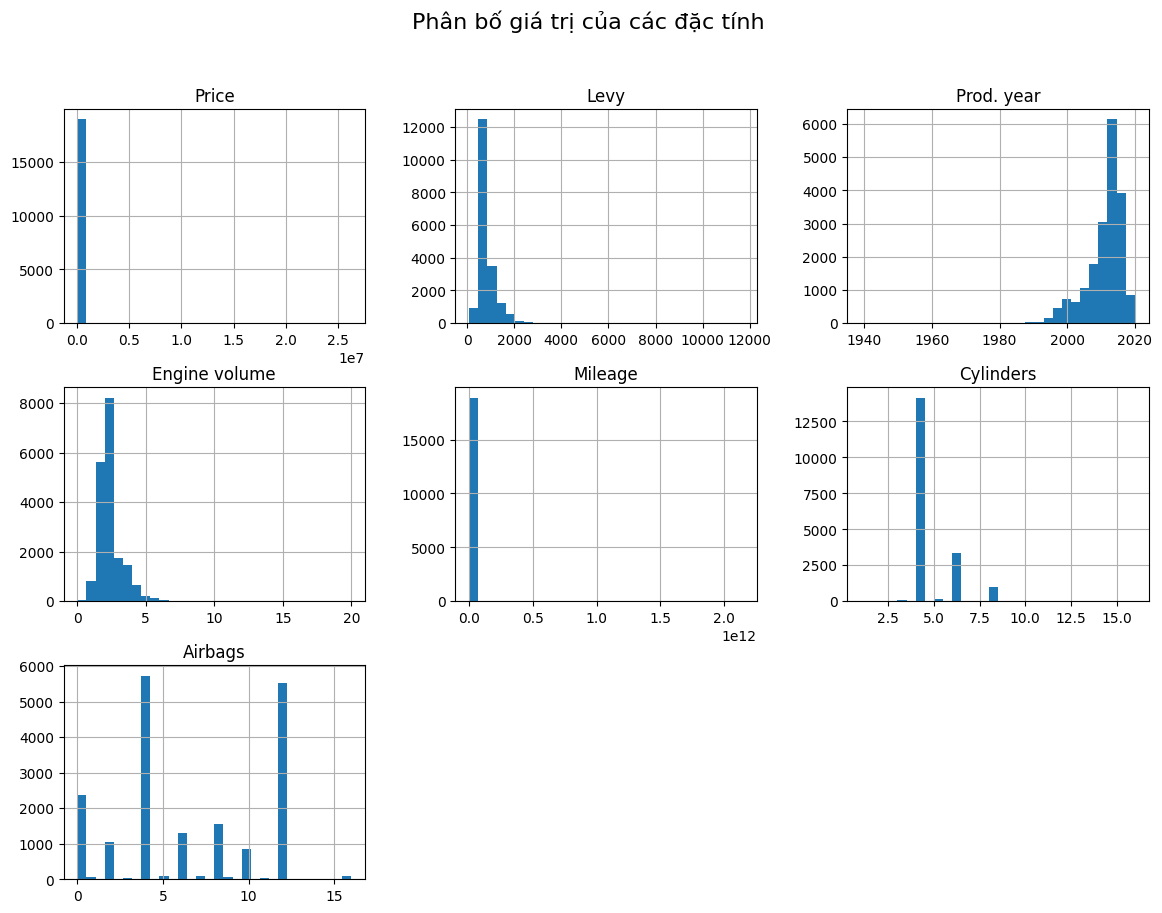

In [142]:
numeric_cols = ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.suptitle("Phân bố giá trị của các đặc tính", fontsize=16)
plt.show()

**Giá với những đặc tính số khác**

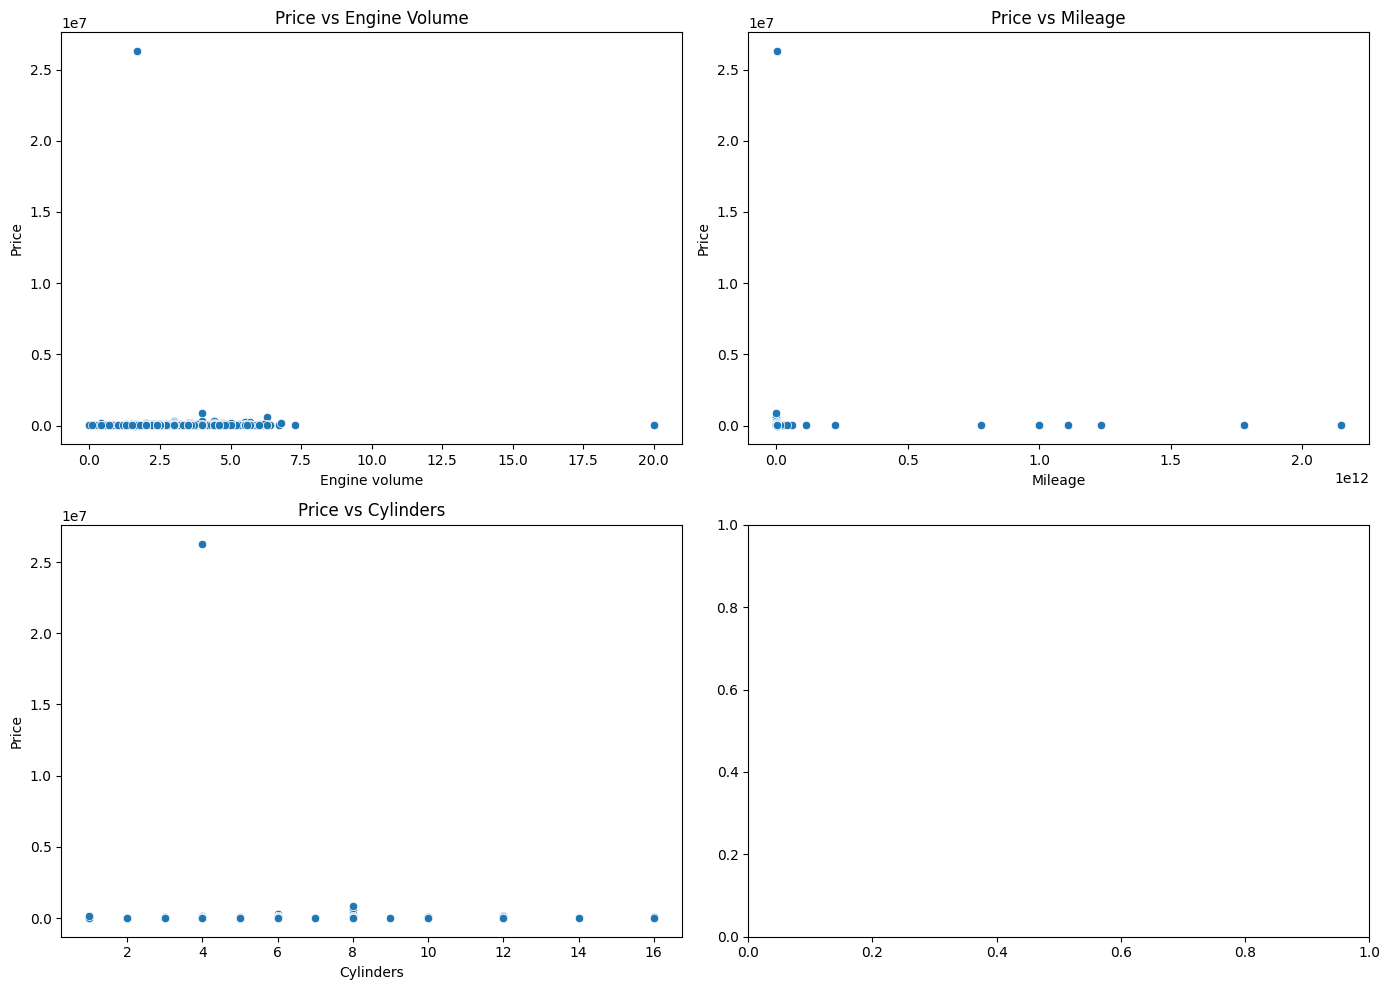

In [143]:
# Scatter plots and boxplots cho phân tích số
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.scatterplot(data=df, x='Engine volume', y='Price', ax=axes[0, 0])
sns.scatterplot(data=df, x='Mileage', y='Price', ax=axes[0, 1])
sns.scatterplot(data=df, x='Cylinders', y='Price', ax=axes[1, 0])

axes[0, 0].set_title('Price vs Engine Volume')
axes[0, 1].set_title('Price vs Mileage')
axes[1, 0].set_title('Price vs Cylinders')

plt.tight_layout()
plt.show()

**Giá với những đặc tính phân loại khác**

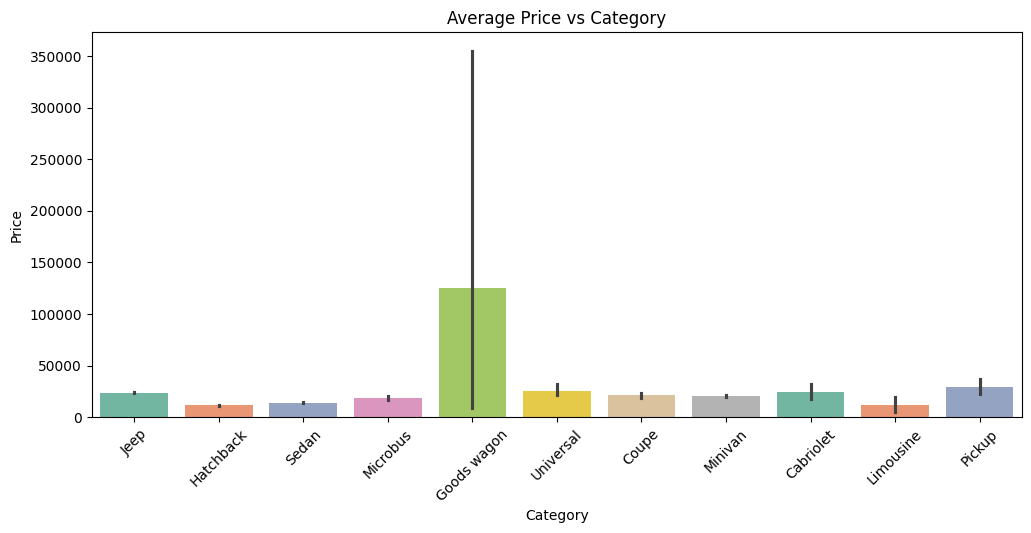

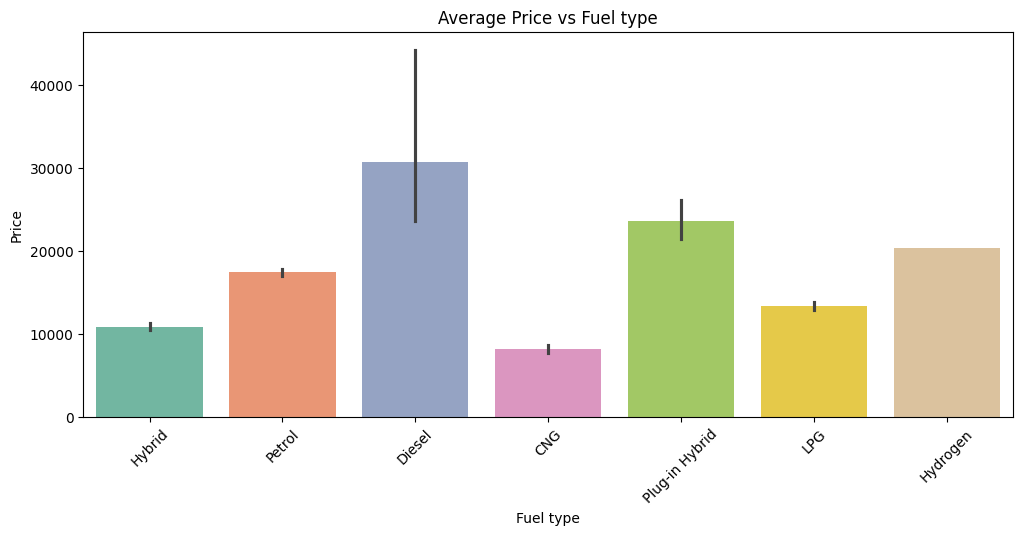

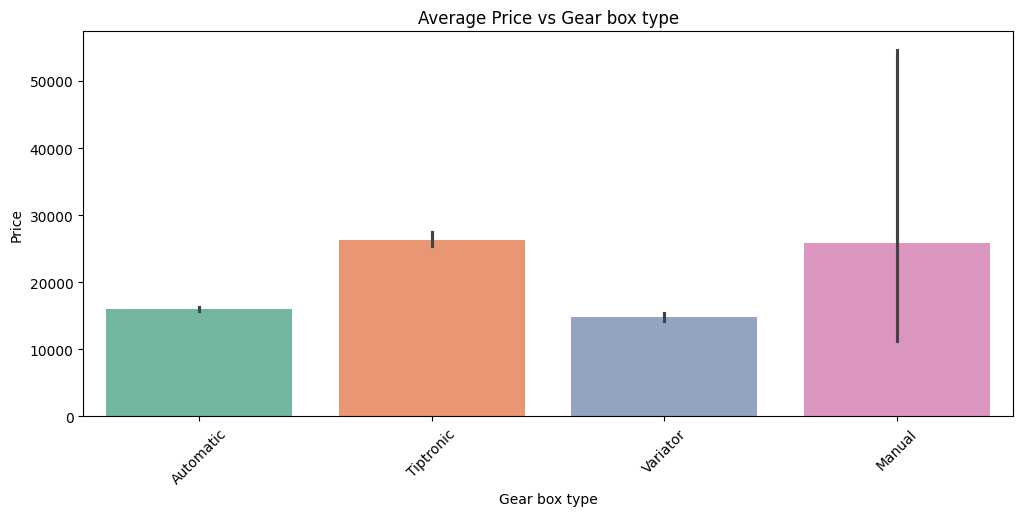

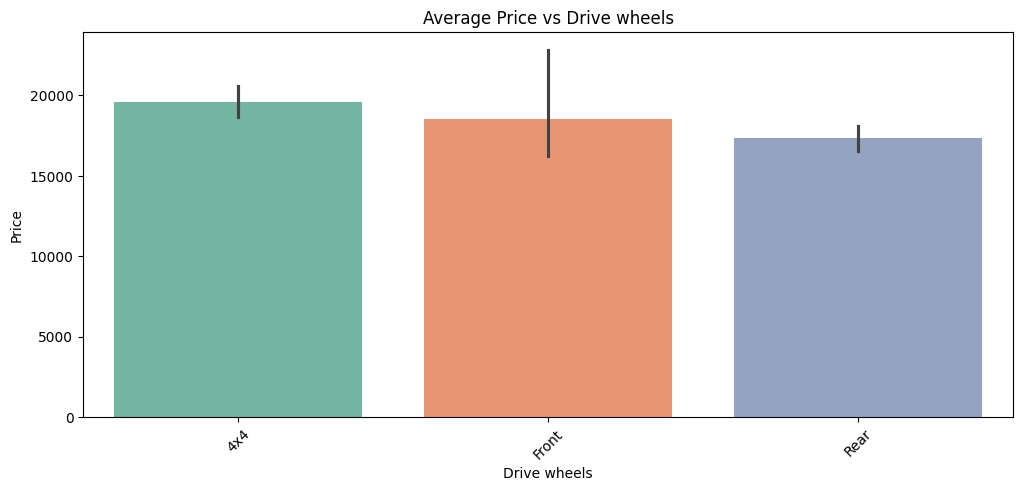

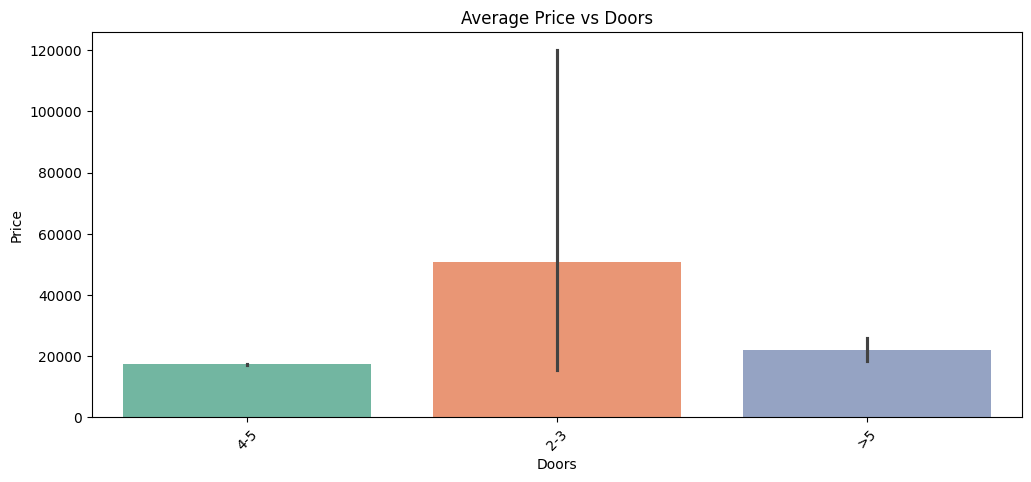

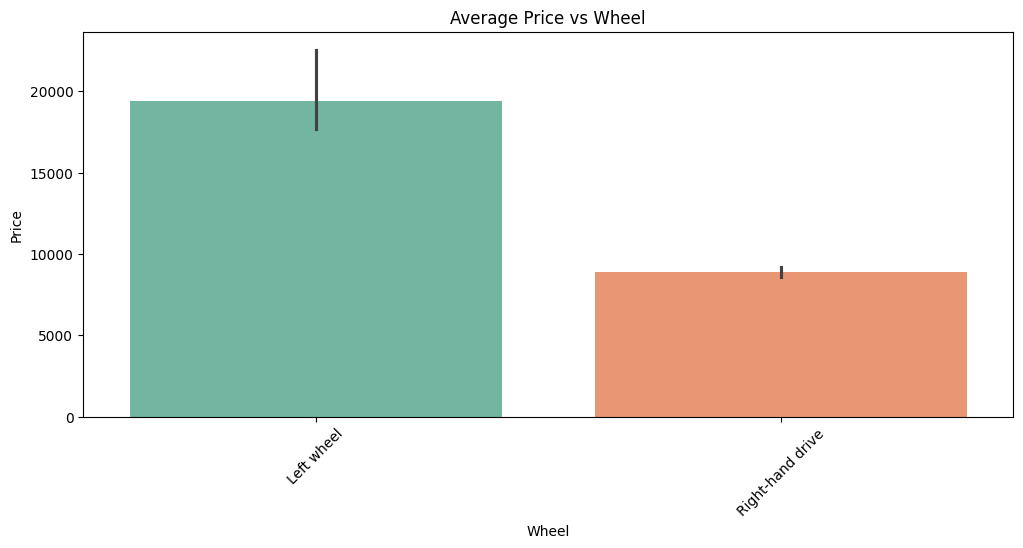

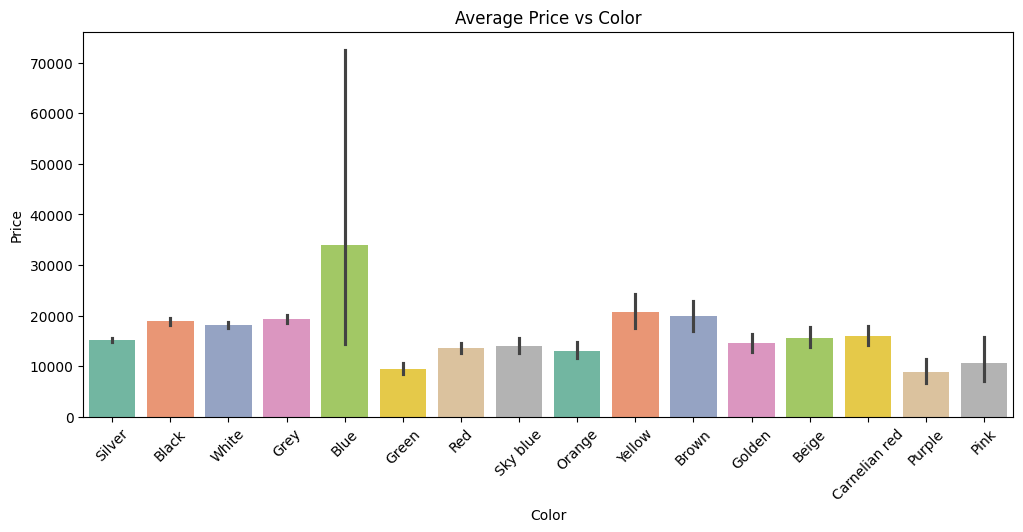

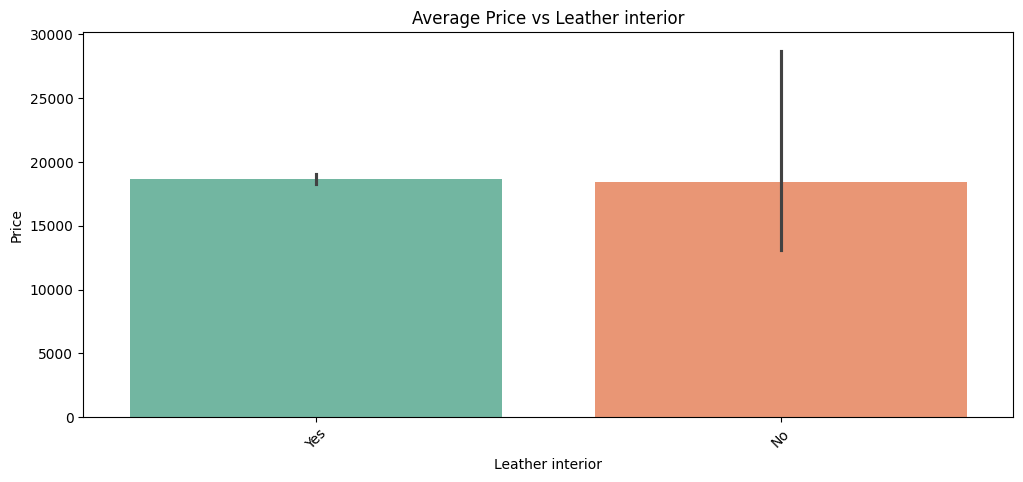

In [144]:
# Barplot analysis cho những cột phân loại
categorical_cols = [ 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Leather interior']

for col in categorical_cols:
    plt.figure(figsize=(12,5))
    sns.barplot(data=df, x=col, y='Price', estimator=np.mean, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Average Price vs {col}')
    plt.show()

**Phân bổ của những giá trị phân loại**

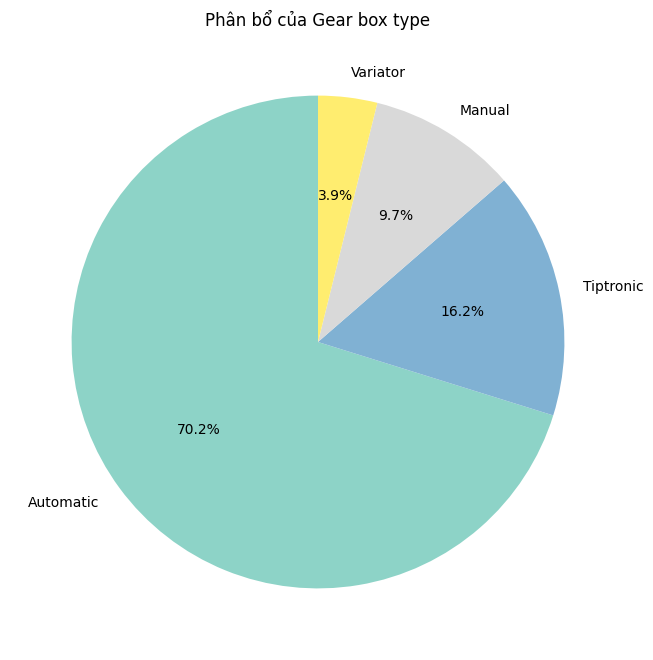

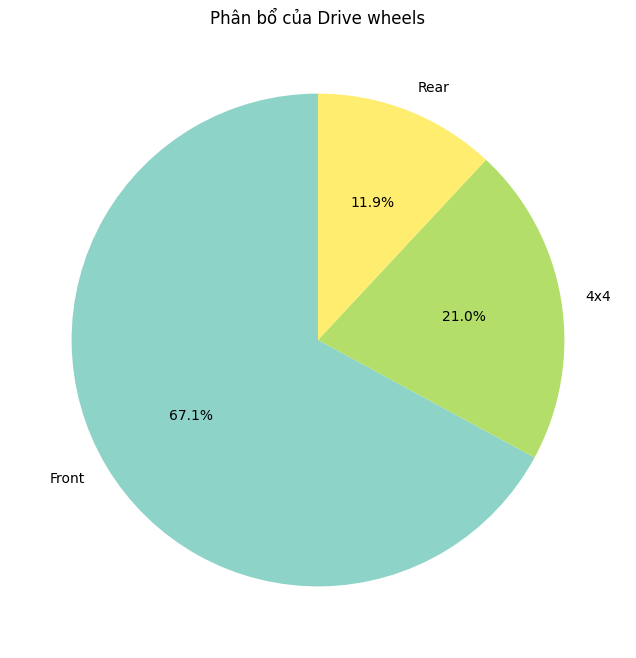

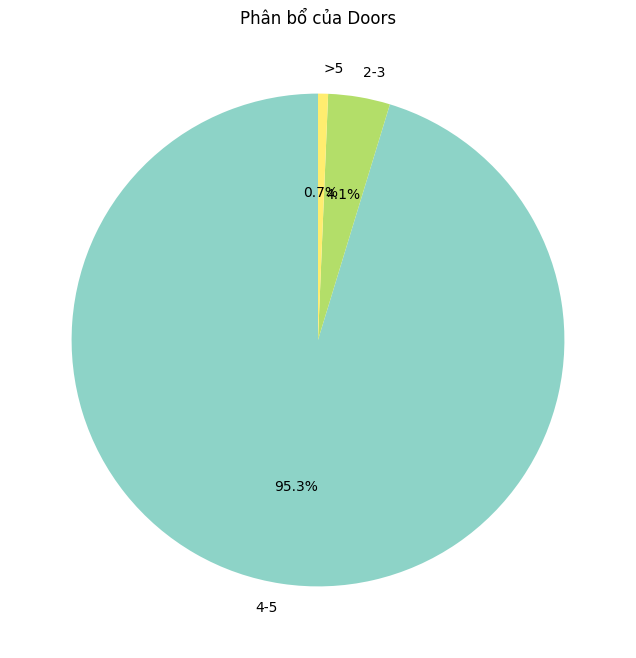

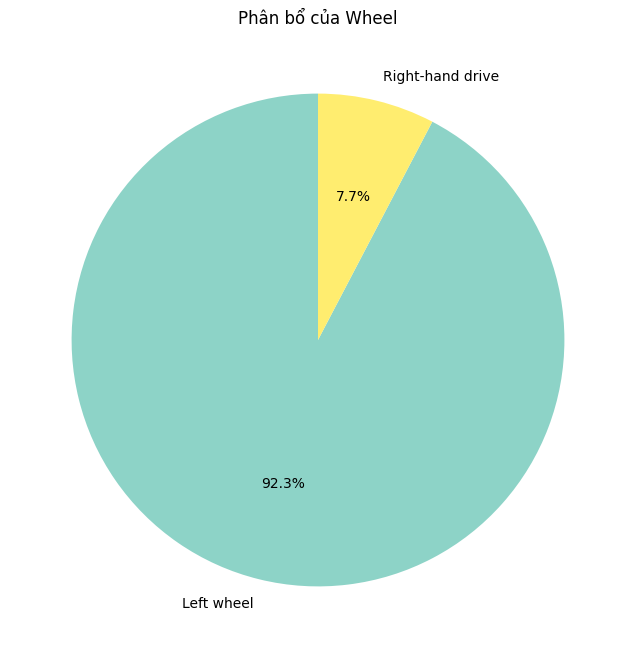

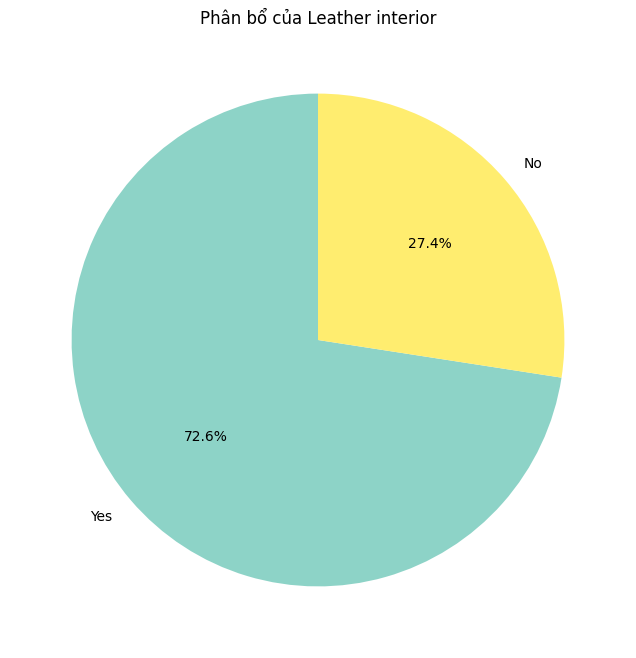

In [145]:
categorical_cols = [  'Gear box type', 'Drive wheels', 'Doors', 'Wheel',  'Leather interior']

for col in categorical_cols:
    plt.figure(figsize=(8,8))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f'Phân bổ của {col}')
    plt.ylabel('')
    plt.show()

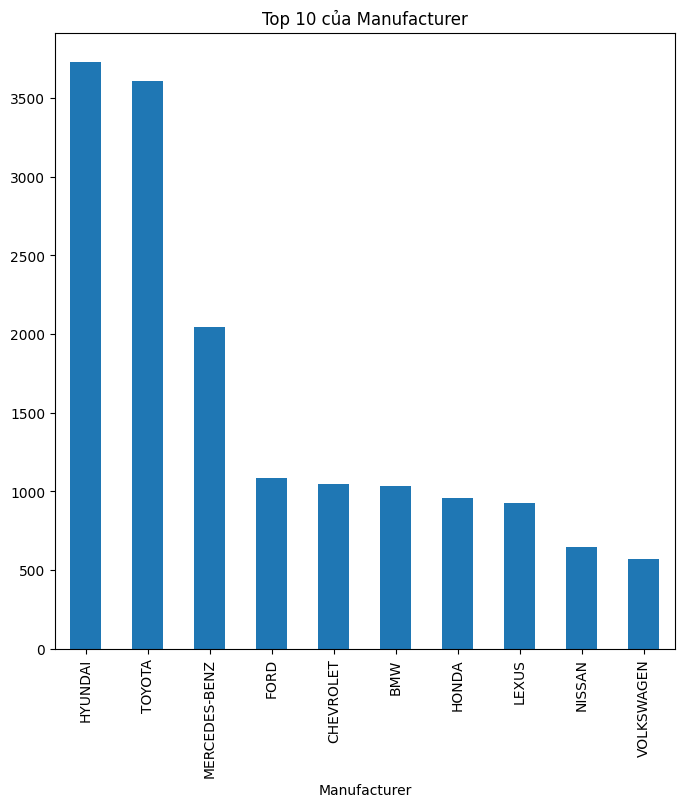

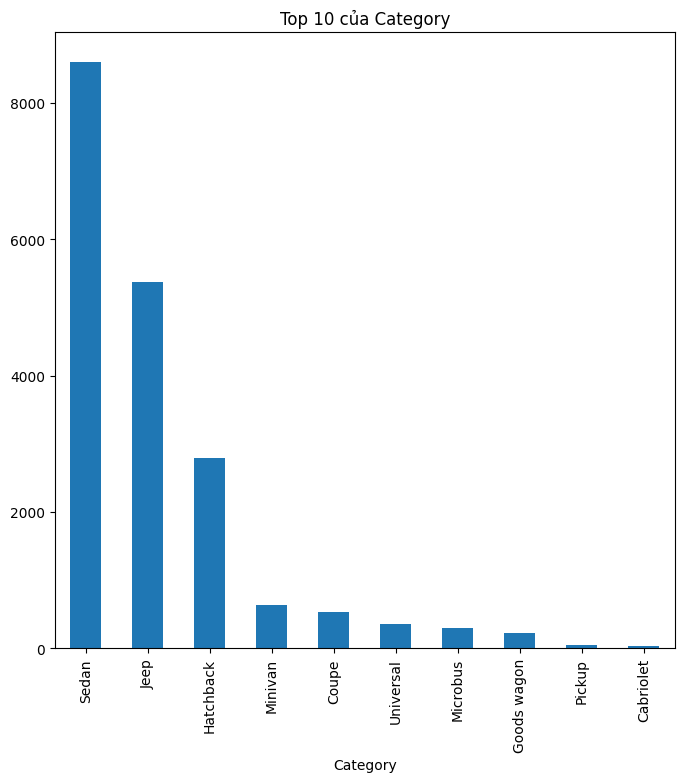

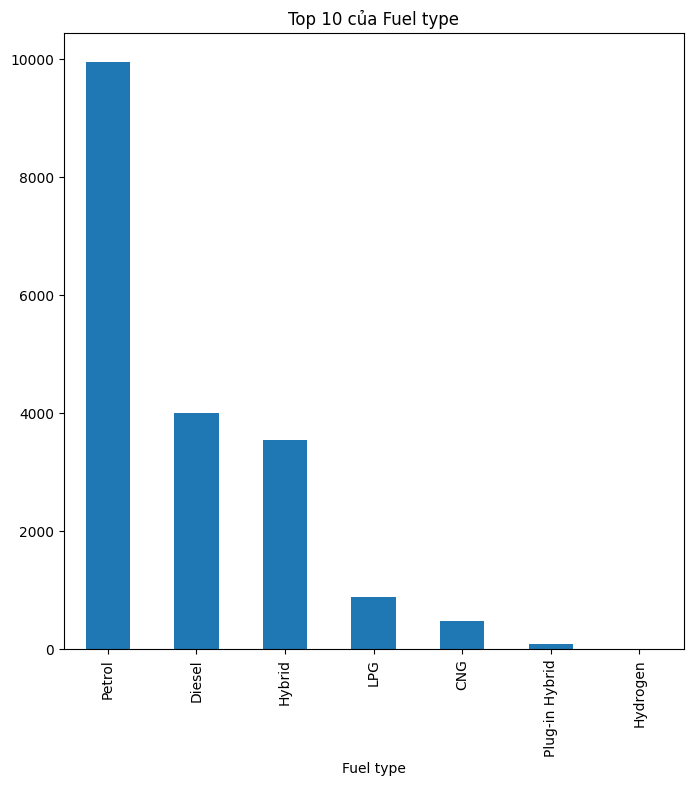

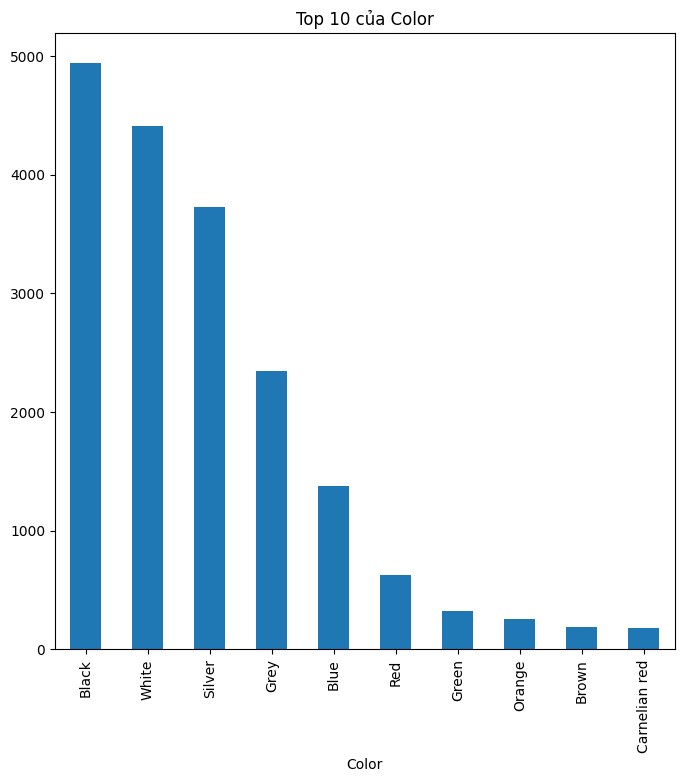

In [146]:
categorical_cols = ['Manufacturer', 'Category', 'Fuel type', 'Color']

for col in categorical_cols:
    plt.figure(figsize=(8,8))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 của {col}')
    plt.ylabel('')
    plt.show()

**Biểu đồ nhiệt**

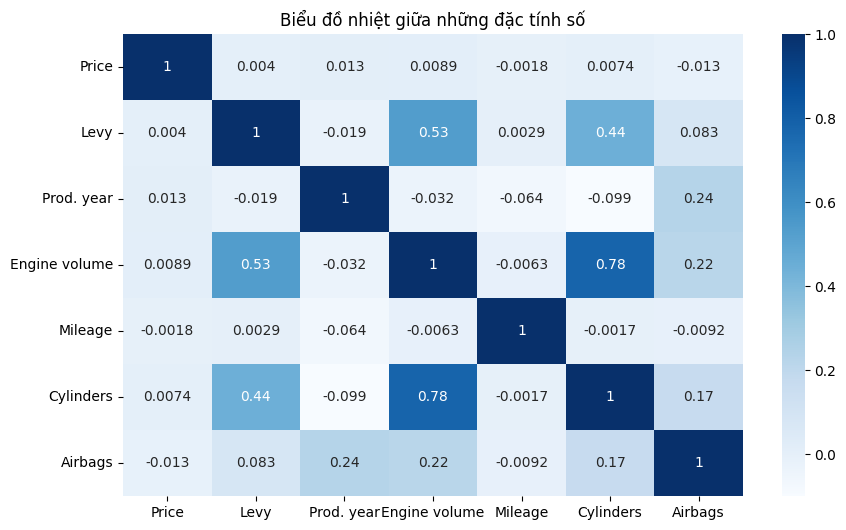

In [147]:
# Biểu đồ nhiệt giữa những đặc tính só
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues')
plt.title('Biểu đồ nhiệt giữa những đặc tính số')
plt.show()

In [148]:
df.dtypes

,0
Price,int64
Levy,float64
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,float64
Mileage,int64


In [149]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()


In [150]:
print(categorical_columns)

['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [151]:
from sklearn.preprocessing import LabelEncoder


In [152]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [179]:
from sklearn.preprocessing import StandardScaler


In [174]:
# Sau khi LabelEncoder, ta sẽ chuẩn hóa các giá trị này
scaler = StandardScaler()

# Áp dụng StandardScaler cho các cột phân loại (đã được mã hóa)
df[categorical_columns] = scaler.fit_transform(df[categorical_columns])

# Kiểm tra lại dữ liệu sau khi chuẩn hóa
print(df[categorical_columns].head())

   Manufacturer     Model  Category  Leather interior  Fuel type  \
0     -0.061132  0.924073 -0.811930          0.614976  -0.790020   
1     -1.410441 -0.496921 -0.811930         -1.626080   0.870883   
2     -0.679565 -0.433657 -1.170113         -1.626080   0.870883   
3     -0.960671 -0.489621 -0.811930          0.614976  -0.790020   
4     -0.679565 -0.433657 -1.170113          0.614976   0.870883   

   Gear box type  Drive wheels     Doors     Wheel     Color  
0      -0.599184     -1.605608  0.158708 -0.288386  0.788503  
1       1.630041     -1.605608  0.158708 -0.288386 -1.263042  
2       2.744654      0.159395  0.158708  3.467577 -1.263042  
3      -0.599184     -1.605608  0.158708 -0.288386  1.161511  
4      -0.599184      0.159395  0.158708 -0.288386  0.788503  


In [175]:
print(numeric_cols)

['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']


In [176]:
df.dtypes

,0
Price,float64
Levy,float64
Manufacturer,float64
Model,float64
Prod. year,float64
Category,float64
Leather interior,float64
Fuel type,float64
Engine volume,float64
Mileage,float64


**Chuẩn hóa dữ liệu số**

In [177]:
from sklearn.preprocessing import StandardScaler


In [180]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [189]:
df.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,-0.027374,1.355428,-0.061132,0.924073,-0.161366,-0.811930,0.614976,-0.790020,1.360292,-0.028060,1.182965,-0.599184,-1.605608,0.158708,-0.288386,0.788503,1.256677
1,-0.010235,0.381975,-1.410441,-0.496921,0.015138,-0.811930,-1.626080,0.870883,0.790536,-0.027937,1.182965,1.630041,-1.605608,0.158708,-0.288386,-1.263042,0.331224
2,-0.052675,-0.223559,-0.679565,-0.433657,-0.867381,-1.170113,-1.626080,0.870883,-1.146637,-0.027774,-0.483436,2.744654,0.159395,0.158708,3.467577,-1.263042,-1.056955
3,-0.077970,-0.016605,-0.960671,-0.489621,0.015138,-0.811930,0.614976,-0.790020,0.220779,-0.028409,-0.483436,-0.599184,-1.605608,0.158708,-0.288386,1.161511,-1.519681
4,-0.035712,-1.079483,-0.679565,-0.433657,0.544649,-1.170113,0.614976,0.870883,-1.146637,-0.029989,-0.483436,-0.599184,0.159395,0.158708,-0.288386,0.788503,-0.594228
5,0.108809,0.057490,-0.567123,1.077365,0.897657,-0.811930,0.614976,-1.343654,-0.348977,-0.028574,-0.483436,-0.599184,0.159395,0.158708,-0.288386,1.161511,-0.594228
6,-0.087360,-0.274659,1.400619,0.709951,-0.161366,-1.170113,0.614976,-0.790020,-0.576880,-0.026566,-0.483436,-0.599184,0.159395,0.158708,-0.288386,1.161511,1.256677
7,-0.093886,-0.300209,-0.567123,1.147928,0.368145,0.978984,0.614976,0.870883,0.106828,-0.027443,-0.483436,-0.599184,0.159395,0.158708,-0.288386,-0.144017,1.256677
8,-0.091029,-1.212342,1.400619,-1.039526,0.544649,0.978984,0.614976,-0.790020,0.220779,-0.023715,-0.483436,-0.599184,0.159395,0.158708,-0.288386,-1.263042,1.256677
9,0.042000,-0.223559,-0.061132,0.907040,-0.690878,-0.811930,0.614976,0.870883,1.360292,-0.029239,1.182965,-0.599184,-1.605608,0.158708,-0.288386,0.788503,1.256677


In [190]:
from sklearn.model_selection import train_test_split


In [191]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
print("NaN trong X_train:", X_train.isnull().sum().sum())
print("NaN trong X_test:", X_test.isnull().sum().sum())
print("NaN trong y_train:", y_train.isnull().sum())
print("NaN trong y_test:", y_test.isnull().sum())


NaN trong X_train: 0
NaN trong X_test: 0
NaN trong y_train: 0
NaN trong y_test: 0


In [194]:
from sklearn.linear_model import LinearRegression


In [195]:
LR = LinearRegression()

In [196]:
# Model training

LR.fit(X_train, y_train)

# Predictions
y_pred = LR.predict(X_test)

In [197]:
print(np.isnan(y_pred).sum(), "NaN in y_pred")
print(np.isnan(y_test).sum(), "NaN in y_test")


0 NaN in y_pred
0 NaN in y_test


In [198]:
# Danh gia mo hinh
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: -0.1055163356986839
Mean Squared Error: 0.010368949066216328


In [199]:

# In ra số lượng NaN đã bị xóa
print(f"Số lượng NaN đã xóa: {np.isnan(y_pred).sum()}")
print(f"Số lượng dự đoán sau khi xóa NaN: {len(y_pred)}")

Số lượng NaN đã xóa: 0
Số lượng dự đoán sau khi xóa NaN: 3785


In [200]:
print(len(y_test))

3785


In [201]:
print("y_test:")
print(y_test[:10])

print("\ny_pred:")
print(y_pred[:10])


y_test:
3499    -0.036347
9232    -0.094298
1810     0.008195
9625    -0.057567
8522     0.001195
10181    0.132283
17442    0.014254
11356   -0.015127
3815    -0.060836
7317    -0.089806
Name: Price, dtype: float64

y_pred:
[-0.04303162 -0.08728082 -0.0100394  -0.12862952  0.01395912  0.04423453
  0.02045418  0.02389786 -0.09094748  0.0252514 ]


** Tows ket thuc o day thoi**

Du doan nhung khong dung KNN duoc

In [160]:
from knn import KNN

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,-0.027374,1.355428,32,1242,-0.161366,4,1,2,1.360292,-0.028060,1.182965,0,0,1,0,12,1.256677
1,-0.010235,0.381975,8,658,0.015138,4,0,5,0.790536,-0.027937,1.182965,2,0,1,0,1,0.331224
2,-0.052675,-0.223559,21,684,-0.867381,3,0,5,-1.146637,-0.027774,-0.483436,3,1,1,1,1,-1.056955
3,-0.077970,-0.016605,16,661,0.015138,4,1,2,0.220779,-0.028409,-0.483436,0,0,1,0,14,-1.519681
4,-0.035712,-1.079483,21,684,0.544649,3,1,5,-1.146637,-0.029989,-0.483436,0,1,1,0,12,-0.594228


In [ ]:
print(X_train.dtypes)
print(X_test.dtypes)


Levy                float64
Manufacturer          int64
Model                 int64
Prod. year          float64
Category              int64
Leather interior      int64
Fuel type             int64
Engine volume       float64
Mileage             float64
Cylinders           float64
Gear box type         int64
Drive wheels          int64
Doors                 int64
Wheel                 int64
Color                 int64
Airbags             float64
dtype: object
Levy                float64
Manufacturer          int64
Model                 int64
Prod. year          float64
Category              int64
Leather interior      int64
Fuel type             int64
Engine volume       float64
Mileage             float64
Cylinders           float64
Gear box type         int64
Drive wheels          int64
Doors                 int64
Wheel                 int64
Color                 int64
Airbags             float64
dtype: object


In [ ]:
knn = KNN()
knn.fit(X_train.astype(float).values, y_train.values)
y_pred = knn.predict(X_test.astype(float).values)


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
y_pred2 = y_pred.copy()

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.metrics import r2_score


In [ ]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.16734996862076623
Mean Squared Error: 0.007809659148906393


**Dung Linear Regression**

In [161]:
from linear_regression import LinearRegressionScratch

In [162]:
model2 = LinearRegressionScratch()

In [163]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

X_test = X_test.astype(float)
y_test = y_test.astype(float)


In [164]:
model2.fit(X_train, y_train, lr=0.01, n_iters=1000)

In [165]:
# Dự đoán
y_pred = model2.predict(X_test)



In [187]:
print(np.isnan(y_pred).sum(), "NaN in y_pred")
print(np.isnan(y_test).sum(), "NaN in y_test")


0 NaN in y_pred
0 NaN in y_test


In [167]:
print("NaN trong X_train:", X_train.isnull().sum().sum())
print("NaN trong X_test:", X_test.isnull().sum().sum())
print("NaN trong y_train:", y_train.isnull().sum())
print("NaN trong y_test:", y_test.isnull().sum())


NaN trong X_train: 0
NaN trong X_test: 0
NaN trong y_train: 0
NaN trong y_test: 0


In [168]:
# Loại bỏ các giá trị NaN trong y_pred
y_pred_clean = y_pred[~np.isnan(y_pred)]

In [188]:

# In ra số lượng NaN đã bị xóa
print(f"Số lượng NaN đã xóa: {np.isnan(y_pred).sum()}")
print(f"Số lượng dự đoán sau khi xóa NaN: {len(y_pred_clean)}")

Số lượng NaN đã xóa: 0
Số lượng dự đoán sau khi xóa NaN: 0


Dung Linear co san

In [184]:
from sklearn.linear_model import LinearRegression


In [185]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [186]:
# Danh gia mo hinh
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: -0.1055163356986839
Mean Squared Error: 0.010368949066216328
